In [1]:
import requests 
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

API_key = '2cac9177ae64d8f6733f9e5a51d63919'

countries = ['Jamaica', 'Indonesia', 'United States',  "Turkey", 'Saudi Arabia' , "Egypt", 'China']

country_name_list = []
maxtemp = []
mintemp = []
humidity = []
windspeed = []

for country_names in countries:

    url = f'http://api.openweathermap.org/data/2.5/weather?q={country_names}&APPID={API_key}&units=metric'
    
    r = requests.get(url)
        
    data = r.json()
        
    formatted_json = json.dumps(data, sort_keys = True, indent = 4)
    
    print(data)
    country_name_list.append(data['name'])
    maxtemp.append(data['main']['temp_max'])
    mintemp.append(data['main']['temp_min'])
    humidity.append(data['main']['humidity'])
    windspeed.append(data['wind']['speed'])
            

df = pd.DataFrame()
df['Names'] = country_name_list
df['Max_Temp'] = maxtemp
df['Min_Temp'] = mintemp
df['Humidity'] = humidity
df['WindSpeed'] = windspeed

df.head()    

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'coord': {'lon': -82.1703, 'lat': 22.9792}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 26.28, 'feels_like': 26.28, 'temp_min': 26.28, 'temp_max': 26.28, 'pressure': 1016, 'humidity': 59, 'sea_level': 1016, 'grnd_level': 1001}, 'visibility': 10000, 'wind': {'speed': 7.44, 'deg': 67, 'gust': 9.66}, 'clouds': {'all': 11}, 'dt': 1698332177, 'sys': {'type': 2, 'id': 47732, 'country': 'CU', 'sunrise': 1698319815, 'sunset': 1698360890}, 'timezone': -14400, 'id': 3556406, 'name': 'Jamaica', 'cod': 200}
{'coord': {'lon': 120, 'lat': -5}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 22.41, 'feels_like': 21.99, 'temp_min': 22.41, 'temp_max': 22.41, 'pressure': 1014, 'humidity': 49, 'sea_level': 1014, 'grnd_level': 967}, 'visibility': 10000, 'wind': {'speed': 1.57, 'deg': 199, 'gust': 1.51}, 'clouds': {'all': 35}, 'dt': 1698332177,

,Names,Max_Temp,Min_Temp,Humidity,WindSpeed
0,Jamaica,26.28,26.28,59,7.44
1,Indonesia,22.41,22.41,49,1.57
2,United States of America,17.45,17.45,84,3.62
3,Turkey,21.40,21.40,29,3.07
4,Saudi Arabia,26.80,26.80,31,4.14


In [2]:
df.isna().sum()

Names        0
Max_Temp     0
Min_Temp     0
Humidity     0
WindSpeed    0
dtype: int64

In [3]:
df.duplicated().sum()

0

In [4]:
df.describe()

,Max_Temp,Min_Temp,Humidity,WindSpeed
count,7.000000,7.000000,7.000000,7.000000
mean,23.432857,22.577143,56.142857,3.971429
std,3.465293,4.268242,20.979582,2.087075
min,17.450000,16.900000,29.000000,1.570000
25%,21.905000,19.425000,40.000000,2.565000
50%,22.890000,22.410000,59.000000,3.620000
75%,26.540000,26.540000,70.500000,5.020000
max,26.800000,26.800000,84.000000,7.440000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Names      7 non-null      object 
 1   Max_Temp   7 non-null      float64
 2   Min_Temp   7 non-null      float64
 3   Humidity   7 non-null      int64  
 4   WindSpeed  7 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 408.0+ bytes


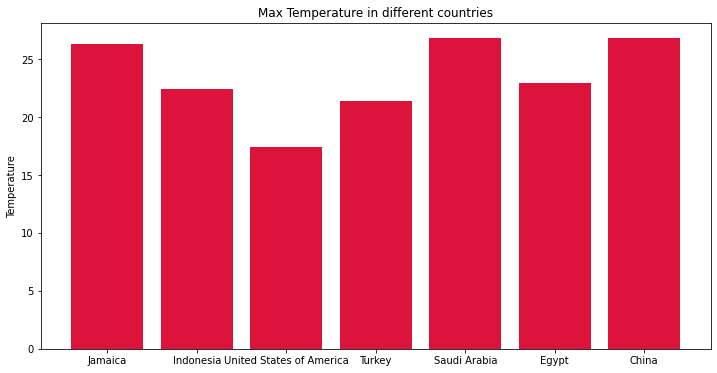

In [6]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'], df['Max_Temp'], color='crimson')
plt.title("Max Temperature in different countries")
plt.ylabel("Temperature")
plt.show()

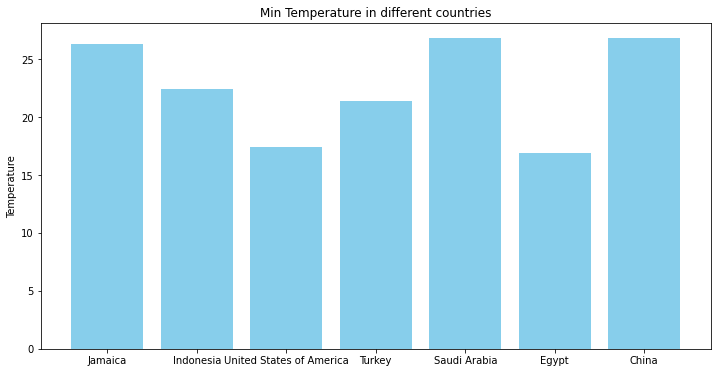

In [7]:
plt.figure(figsize=(12,6))
plt.bar(df['Names'], df['Min_Temp'], color='skyblue')
plt.title("Min Temperature in different countries")
plt.ylabel("Temperature")
plt.show()

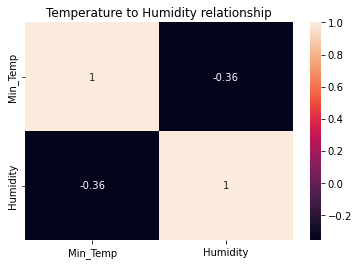

In [8]:
corre = df[['Min_Temp','Humidity']].corr()
sns.heatmap(corre, annot=True)
plt.title("Temperature to Humidity relationship")
plt.show()